In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/Model_Training/Sourav/Final_csv_ln+ren_Raghvendra_sir.xlsx')
data.head()

,OpportunityID,businessrecordtimeoldest_value,businessrecordtimeoldest_flag,businessrecordtimenewest_value,businessrecordtimenewest_flag,businessrecordupdated12m_-1.0,businessrecordupdated12m_0.0,businessrecordupdated12m_1.0,inputaddrsourcecount_value,inputaddrsourcecount_flag,...,Industry_Mining,Industry_Retail,Industry_Services,Industry_Transportation & Public Utilities,Industry_Wholesale,Industry_Wholesale Trade,Drop_category_Neutral/Null,Drop_category_Positive,LatestMonth_ReturnItemDays_value,LatestMonth_ReturnItemDays_flag
0,0062M00000gYqZQQA0,346,0,1,0,0,0,1,10,0,...,0,0,1,0,0,0,0,0,0,0
1,0062M00000gYSpGQAW,884,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0062M00000gYsQcQAK,43,0,1,0,0,0,1,10,0,...,0,0,1,0,0,0,0,1,0,1
3,0062M00000n0BEfQAM,243,0,1,0,0,0,1,3,0,...,0,0,0,1,0,0,0,1,0,0
4,0062M00000gYTaCQAW,160,0,1,0,0,0,1,10,0,...,0,1,0,0,0,0,0,1,0,0


In [4]:
#data_test = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v10/v10_after_eda_test_bankst.6.xlsx')

In [5]:
data.shape

(3347, 177)

In [6]:
data.WriteOff_YN

0       0
1       0
2       0
3       0
4       0
       ..
3342    0
3343    0
3344    1
3345    0
3346    0
Name: WriteOff_YN, Length: 3347, dtype: int64

In [7]:
cor = data.corr()
cor

,businessrecordtimeoldest_value,businessrecordtimeoldest_flag,businessrecordtimenewest_value,businessrecordtimenewest_flag,businessrecordupdated12m_-1.0,businessrecordupdated12m_0.0,businessrecordupdated12m_1.0,inputaddrsourcecount_value,inputaddrsourcecount_flag,businessactivity03m_-1.0,...,Industry_Mining,Industry_Retail,Industry_Services,Industry_Transportation & Public Utilities,Industry_Wholesale,Industry_Wholesale Trade,Drop_category_Neutral/Null,Drop_category_Positive,LatestMonth_ReturnItemDays_value,LatestMonth_ReturnItemDays_flag
businessrecordtimeoldest_value,1.000000,-0.263963,0.067583,-0.264774,-0.264774,0.006574,0.246512,0.433988,-0.261214,0.010021,...,-0.006211,0.029399,0.019542,-0.019081,-0.005742,-0.016381,-0.010578,-0.016605,-0.006643,-0.013395
businessrecordtimeoldest_flag,-0.263963,1.000000,-0.081850,0.996550,0.996550,-0.068106,-0.910110,-0.550002,0.989586,0.006891,...,-0.016419,-0.003057,-0.005998,-0.013680,0.031355,-0.011355,0.000203,-0.021673,0.000252,0.029731
businessrecordtimenewest_value,0.067583,-0.081850,1.000000,-0.082133,-0.082133,0.678342,-0.199685,-0.078757,-0.080998,-0.030933,...,-0.003521,0.001889,-0.007965,0.021471,-0.002794,0.025076,-0.008199,0.005124,0.023645,-0.004707
businessrecordtimenewest_flag,-0.264774,0.996550,-0.082133,1.000000,1.000000,-0.068342,-0.913261,-0.551414,0.986172,0.008123,...,-0.016476,-0.003941,-0.006515,-0.012825,0.030961,-0.011520,0.000048,-0.018829,0.007664,0.028183
businessrecordupdated12m_-1.0,-0.264774,0.996550,-0.082133,1.000000,1.000000,-0.068342,-0.913261,-0.551414,0.986172,0.008123,...,-0.016476,-0.003941,-0.006515,-0.012825,0.030961,-0.011520,0.000048,-0.018829,0.007664,0.028183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Industry_Wholesale Trade,-0.016381,-0.011355,0.025076,-0.011520,-0.011520,0.012344,0.005802,0.010799,-0.010854,-0.022133,...,-0.002999,-0.027789,-0.068656,-0.038861,-0.009929,1.000000,-0.004841,0.001220,-0.004624,-0.028399
Drop_category_Neutral/Null,-0.010578,0.000203,-0.008199,0.000048,0.000048,-0.010019,0.004046,-0.007656,-0.026230,0.000203,...,-0.002415,-0.007257,0.012451,-0.019307,-0.007996,-0.004841,1.000000,-0.055597,-0.022506,0.094180
Drop_category_Positive,-0.016605,-0.021673,0.005124,-0.018829,-0.018829,0.003293,0.016376,0.018651,-0.021866,0.036868,...,0.043443,-0.006579,-0.010251,0.022302,0.010132,0.001220,-0.055597,1.000000,0.010350,-0.005520
LatestMonth_ReturnItemDays_value,-0.006643,0.000252,0.023645,0.007664,0.007664,0.009581,-0.011125,-0.009726,0.000955,-0.002413,...,0.013981,-0.004305,0.036692,-0.047839,-0.002407,-0.004624,-0.022506,0.010350,1.000000,-0.214099


In [8]:
def corelation(df,thresold):
    cor_cor=set()
    cor_matrix=df.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs((cor_matrix.iloc[i,j]))>thresold:
                colname=cor_matrix.columns[i]
                cor_cor.add(colname)
    return cor_cor

In [9]:
cor_features=corelation(data,0.7)
print(len(set(cor_features)),'\n')
cor_features

81 



{'AdjustedMonthlyDeposits',
 'Avg_ReturnItemdays',
 'BBC_Position__c',
 'Last3Statments_MA_AvgDailyBalance',
 'Last3Statments_Sum_NumReturnItems',
 'LatestMonth_ReturnItemDays_flag',
 'LatestMonth_ReturnItemDays_value',
 'Paybackamount',
 'Renewal_PreviousAvgDailyBalance',
 'TwoMonthAvg_AdjustedMonthlyDeposits',
 'WOGross_AdvanceBalance',
 'assetaircraftcount_flag',
 'assetpropassessedtotalcurrent_flag',
 'assetpropassessedtotalcurrent_value',
 'assetpropassessedtotalever_flag',
 'assetpropcountcurrent_flag',
 'assetpropcountcurrent_value',
 'assetpropcountever_flag',
 'assetpropsqfootagetotalcurrent_flag',
 'assetpropsqfootagetotalcurrent_value',
 'assetpropsqfootagetotalever_flag',
 'assetwatercraftcount_flag',
 'associatecount_flag',
 'associatecountwithjudgment_flag',
 'associatecountwithjudgment_value',
 'associatecurrcountwithfelony_flag',
 'associatejudgmentcount_flag',
 'associatewatchlistcount_flag',
 'bankruptcycount12m_f1',
 'bankruptcycount12m_f2',
 'bankruptcycount_f1',
 '

In [10]:
data.shape

(3347, 177)

In [11]:
data.drop(columns = ['AdjustedMonthlyDeposits', 'Avg_ReturnItemdays', 'BBC_Position__c', 'Last3Statments_MA_AvgDailyBalance',
 'Last3Statments_Sum_NumReturnItems', 'LatestMonth_ReturnItemDays_flag', 'LatestMonth_ReturnItemDays_value', 'Paybackamount',
 'Renewal_PreviousAvgDailyBalance', 'TwoMonthAvg_AdjustedMonthlyDeposits', 'assetaircraftcount_flag', 'bankruptcytimenewest_value',
 'assetpropassessedtotalcurrent_flag', 'assetpropassessedtotalcurrent_value', 'assetpropassessedtotalever_flag', 'assetpropcountcurrent_flag',
 'assetpropcountcurrent_value', 'assetpropcountever_flag', 'assetpropsqfootagetotalcurrent_flag', 'assetpropsqfootagetotalcurrent_value',
 'assetpropsqfootagetotalever_flag', 'assetwatercraftcount_flag', 'associatecount_flag', 'associatecountwithjudgment_flag',
 'associatecountwithjudgment_value', 'associatecurrcountwithfelony_flag', 'associatejudgmentcount_flag', 'associatewatchlistcount_flag',
 'bankruptcycount12m_f1', 'bankruptcycount12m_f2', 'bankruptcycount_f1', 'bankruptcycount_f2', 'bankruptcytimenewest_flag',
  'businessactivity06m_-1.0', 'businessactivity06m_0.0', 'businessactivity06m_1.0', 'businessactivity06m_5.0', 'businessactivity12m_-1.0',
 'businessactivity12m_0.0',  'businessrecordtimenewest_flag', 'businessrecordupdated12m_-1.0', 'businessrecordupdated12m_1.0','firmageobserved_flag',
 'firmageobserved_value', 'firmparentcompanyind_f1', 'firmparentcompanyind_f3', 'inputaddrownership_flag', 'inputaddrsourcecount_flag',
 'inputaddrtimeoldest_flag', 'inputaddrtimeoldest_value', 'inputaddrtype_0.0', 'inputaddrvacancy_1.0', 'inputbusaddrcurrentcount_flag',
 'inputphoneresidential_0.0', 'inquirycreditcount03m_flag', 'inquirycreditcount12m_flag', 'inquiryhighriskcount03m_flag',
 'inquiryhighriskcount12m_flag', 'judgmentcivilcourtcount_flag', 'judgmentcivilcourttotalamount_flag', 'lienfedtaxcount_flag',
 'lienfedtaxtotalamount_flag', 'lienfedtaxtotalamount_value', 'orglocationcount_flag', 'orglocationcount_value', 'orgrelatedcount_flag',
 'orgrelatedcount_flag.1', 'orgrelatedcount_value', 'orgrelatedcount_value.1', 'outbestsic_flag', 'sosstandingbest_-1.0', 'sosstandingbest_3.0',
 'sosstandingdefunct_-1.0', 'sosstandingdefunct_0.0', 'sostimeagentchange_flag', 'uccactivecount_flag', 'uccactivecount_value',
 'ucccount_flag', 'uccrolesactive_-1.0', 'ucctimenewest_flag'], axis =1, inplace = True)

In [12]:
data.shape

(3347, 97)

In [13]:
for i in data.columns.sort_values():
  print(i)

Credit_Score__c
Drop_category_Neutral/Null
Drop_category_Positive
FundedAmount
FundedWriteOffAmount_Gross
HB_with_LCF_Payment__c
Industry_Construction
Industry_E-Commerce
Industry_Finance, Insurance, Real Estate
Industry_Manufacturing
Industry_Mining
Industry_Retail
Industry_Services
Industry_Transportation & Public Utilities
Industry_Wholesale
Industry_Wholesale Trade
Is_this_Business_home_based__c_Yes
Last3Statments_MA_AdjustedMonthlyDeposits
Last3Statments_MA_NumReturnItems
Last3Statments_MA_OverdraftDays
Last3Statments_MA_ReturnItemDays
LatestMonth_ReturnItemDays
NumberOfBankStatements
OpportunityID
OpportunityID_ren
PctAvgDailybalance2AvgMonthlyDeposits
PctChangeInReveune
Renewal_CountPreviousDeals
Renewal_PreviousAvgMonthRevenue
Renewal_PreviousCountBounces
Renewal_PreviousHBwLCF
Renewal_PreviousPace
Renewal_PreviousPaidPercentageOfRTR
Renewal_PreviousPosition
Renewal_TwoWeekBounces
Time_in_Business__c
WOGross_AdvanceBalance
WriteOff_YN
assetpropassessedtotalever_value
assetpropc

### Model Training

In [14]:
# X = data.drop(['WriteOff_YN','Industry','Industry_Group__c','OpportunityID',
#               'FundedWriteOffAmount_Net','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyRevenue',
#               'LatestMonth_ReturnItemDays','Avg_ReturnItemdays'],axis = 1)
# y = data['WriteOff_YN']

In [15]:
# Please do check the above correlation also. Some features already dropped as they are highly correlated to each other like -
# 'Paybackamount', 'WriteoffAdvance_Gross'
X = data.drop(['WriteOff_YN','OpportunityID', 'OpportunityID_ren', 'WOGross_AdvanceBalance',
               'FundedWriteOffAmount_Gross', 'NumberOfBankStatements', 'FundedAmount', 
               'LatestMonth_ReturnItemDays'],axis = 1)
y = data['WriteOff_YN']

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3347 entries, 0 to 3346
Data columns (total 89 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   businessrecordtimeoldest_value              3347 non-null   int64  
 1   businessrecordtimeoldest_flag               3347 non-null   int64  
 2   businessrecordtimenewest_value              3347 non-null   int64  
 3   businessrecordupdated12m_0.0                3347 non-null   int64  
 4   inputaddrsourcecount_value                  3347 non-null   int64  
 5   businessactivity03m_-1.0                    3347 non-null   int64  
 6   businessactivity03m_0.0                     3347 non-null   int64  
 7   businessactivity03m_1.0                     3347 non-null   int64  
 8   businessactivity03m_2.0                     3347 non-null   int64  
 9   businessactivity03m_3.0                     3347 non-null   int64  
 10  businessacti

In [17]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.20,random_state=42, stratify = y)

In [18]:
# X_test = data_test.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross','LatestMonth_ReturnItemDays',
#               'Paybackamount','FundedAmount', 'WOGross_AdvanceBalance','Last3Statments_Sum_NumReturnItems'],axis = 1)
# y_test = data_test['WriteOff_YN']

In [19]:
print('Shape of x_train is: {}'.format(X_train.shape))
print('Shape of x_val is: {}'.format(X_val.shape))
#print('Shape of x_test is: {}'.format(X_test.shape))
print('----------------------------------------------')
print('Shape of y_train is: {}'.format(y_train.shape))
print('Shape of y_val is: {}'.format(y_val.shape))
#print('Shape of y_test is: {}'.format(y_test.shape))

Shape of x_train is: (2677, 89)
Shape of x_val is: (670, 89)
----------------------------------------------
Shape of y_train is: (2677,)
Shape of y_val is: (670,)


In [20]:
#checking the skewness of train set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_train).count(1)/len(y_train))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_train).count(0)/len(y_train)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [21]:
#checking the skewness of validation set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_val).count(1)/len(y_val))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_val).count(0)/len(y_val)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [22]:
# #checking the skewness of validation set
# print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_test).count(1)/len(y_test))*100)))
# print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_test).count(0)/len(y_test)*100)))

#XGBoost Parameters Explanation


1.   eta - Learning rate - Prevents overfitting - Default = 0.3 - Range = [0,1]
2.   gamma - min_split_loss - Min loss reduction for a further partition - default = 0 - range = [0,infinity] (Higher gamma value means smaller loss reduction which means more splits. As a result, more conservative model,chances of improvement in accuracy.Higher values can also cause overfitting).
3.  lambda - L2 regularisation - default=1 - Higher value means more conservative model, likely to overfit
4. alpha - L1 regularization - default=0 - Higher values lead to more conservative model, likely to overfit 
5. scale_pos_weight - default=1 - Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).









In [23]:
quantile_1 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.25)
quantile_1

1245.8400000000001

In [24]:
quantile_2 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.5)
quantile_2

3779.25

In [25]:
quantile_3 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.75)
quantile_3

8807.41

In [26]:
# weight = []
# for i in data.index:
#   if data['WriteOff_YN'][i] == 0:
#     weight.append(1.0)
#   else:
#     if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
#       weight.append(1.25)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
#       weight.append(1.5)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
#       weight.append(2.0)
#     else:
#       weight.append(2.25)

# weight = np.array(weight)
# len(weight)

In [27]:
weight = []
for i in y_train.index:
  if y_train[i] == 0:
    weight.append(1.0)
  else:
    if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
      weight.append(1.25)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
      weight.append(1.5)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
      weight.append(2.0)
    else:
      weight.append(2.25)

weight = np.array(weight)
len(weight)

2677

In [28]:
# data[(data['FundedWriteOffAmount_Gross'] >= quantile_2) & (data['FundedWriteOffAmount_Gross'] < quantile_3)]

In [29]:
# median_WO = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].median()
# median_WO

In [30]:
# weight = []
# for i in data.index:
#   if data['FundedWriteOffAmount_Gross'][i] > median_WO:
#     weight.append(2)
#   else:
#     weight.append(1)
# weight = np.array(weight)
# len(weight)

In [31]:
# L1 = 0
# L2 = 10
# lr = 0.3

In [502]:
parameters = {
    'eval_metric':['aucpr'],
    'use_label_encoder':[False],
    'n_estimators':[1,5,10,15,20,25,30,40], # number of decision trees used in Xgboost model
    'scale_pos_weight': [1,2,3,4,5,6,7,8,9,10], # used to tackle unbalanced datasets(same as upsampling, SMOTE,etc)
    'subsample':[0.3,0.75], # how much % of data you are taking for estimator building.
    'reg_alpha':[0],
    'reg_lambda':[0.05], #perform L2 regularization on leaf weights(tackle overfitting)(control how deep a tree can grow)
    'learning_rate':[0.3], # Learning rate(new weight updation after every epoch in a conservative manner)
    'gamma':[0.25], #Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
    'colsample_bytree':[1],
    'colsample_bylevel':[1],
    'colsample_bynode':[1]
} 

In [503]:
from datetime import datetime as dt
start = dt.now()
x_cfl = XGBClassifier(objective='binary:logistic') #initializing xgboost model

clf = GridSearchCV(estimator=x_cfl, 
                   param_grid=parameters, 
                   scoring='roc_auc',
                   n_jobs=-1, 
                   cv=5, 
                   return_train_score=True)

clf.fit(X_train,y_train, sample_weight = weight)
running_secs = (dt.now() - start).seconds
running_secs

93

In [504]:
# best parameters after training
clf.best_estimator_

XGBClassifier(eval_metric='aucpr', gamma=0.25, learning_rate=0.3,
              n_estimators=15, reg_lambda=0.05, subsample=0.75,
              use_label_encoder=False)

In [505]:
clf.best_params_

{'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'aucpr',
 'gamma': 0.25,
 'learning_rate': 0.3,
 'n_estimators': 15,
 'reg_alpha': 0,
 'reg_lambda': 0.05,
 'scale_pos_weight': 1,
 'subsample': 0.75,
 'use_label_encoder': False}

In [506]:
#predict_y_test = clf.predict(X_test)
#predict_y_proba_test = clf.predict_proba(X_test)
predict_y_train = clf.predict(X_train)
predict_y_proba_train = clf.predict_proba(X_train)
predict_y_val = clf.predict(X_val)
predict_y_proba_val = clf.predict_proba(X_val)

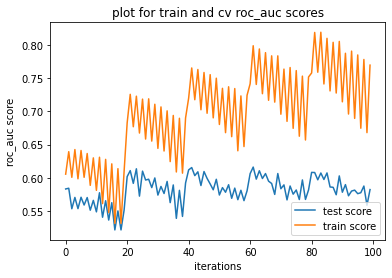

In [507]:
#here test score refers to the cv score
x_axis = [i for i in range(100)]
plt.plot(x_axis,clf.cv_results_['mean_test_score'][:100])
plt.plot(x_axis,clf.cv_results_['mean_train_score'][:100])
plt.legend(["test score", "train score"], loc ="lower right")
plt.xlabel('iterations')
plt.ylabel('roc_auc score')
plt.title('plot for train and cv roc_auc scores')
plt.show()

In [508]:
from sklearn.metrics import precision_score,recall_score

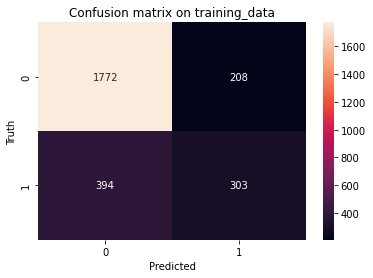

----------------------------
TP: 303
TN: 1772
FP: 208
FN: 394
F1-score: 0.5016556291390729
accuracy: 0.7751214045573404
Precision: 0.5929549902152642
Recall: 0.4347202295552367


In [509]:
# on training data
sns.heatmap(confusion_matrix(y_train,predict_y_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_train, predict_y_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))


print('F1-score: {}'.format(f1_score(predict_y_train,y_train)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_train,predict_y_train)))
print('Recall: {}'.format(recall_score(y_train,predict_y_train)))

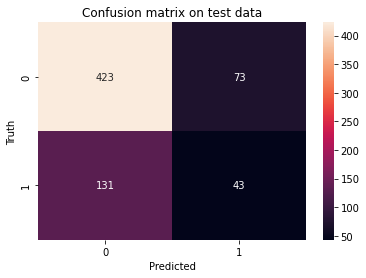

----------------------------
----------------------------
TP: 43
TN: 423
FP: 73
FN: 131
----------------------------
F1-score: 0.29655172413793107
accuracy: 0.6955223880597015
Precision: 0.3706896551724138
Recall: 0.2471264367816092


In [510]:
# on validation set
sns.heatmap(confusion_matrix(y_val,predict_y_val), annot=True, fmt='d')
plt.title('Confusion matrix on test data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_val,predict_y_val).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_val,predict_y_val)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_val,predict_y_val)))
print('Recall: {}'.format(recall_score(y_val,predict_y_val)))

In [511]:
# # on test set 
# sns.heatmap(confusion_matrix(y_test,predict_y_test), annot=True, fmt='d')
# plt.title('Confusion matrix on test data')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()
# print("----------------------------")

# tn, fp, fn, tp = confusion_matrix(y_test,predict_y_test).ravel()
# print("----------------------------")

# print('TP: {}'.format(tp))
# print('TN: {}'.format(tn))
# print('FP: {}'.format(fp))
# print('FN: {}'.format(fn))
# print("----------------------------")

# print('F1-score: {}'.format(f1_score(y_test,predict_y_test)))
# print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
# print('Precision: {}'.format(precision_score(y_test,predict_y_test)))
# print('Recall: {}'.format(recall_score(y_test,predict_y_test)))

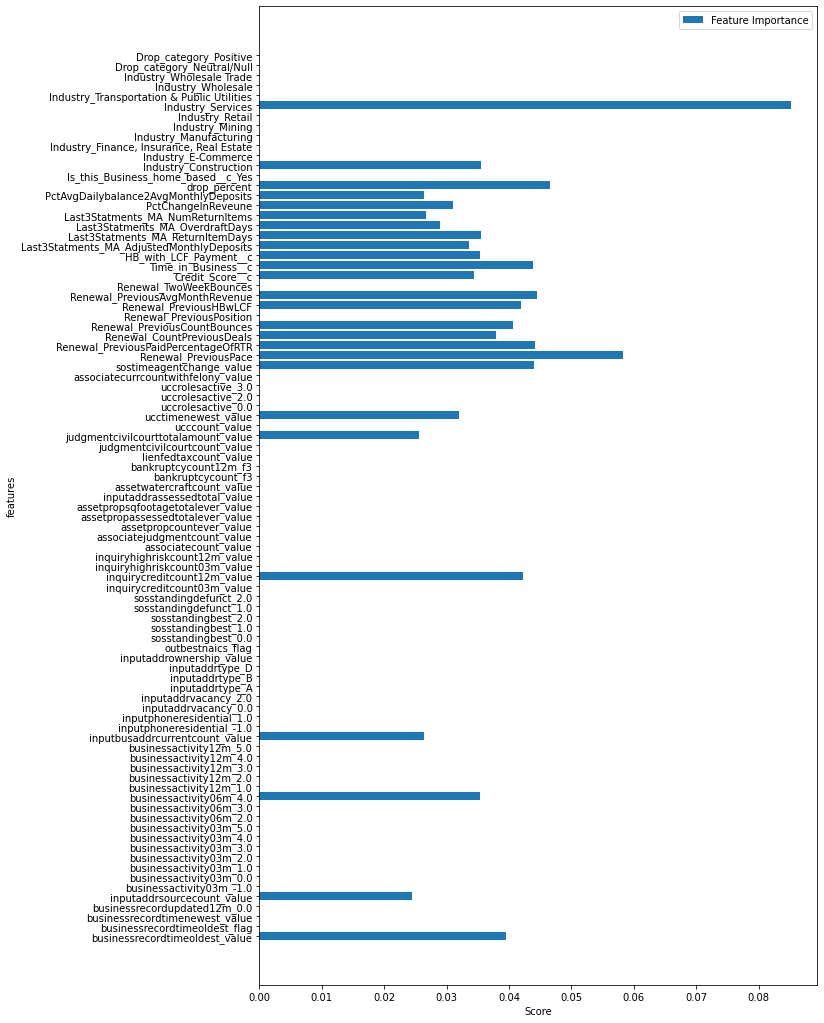

In [512]:
# check for feature importance
features = X_train.columns
features
gain = clf.best_estimator_.feature_importances_
plt.figure(figsize = (10, 18))
plt.barh(features , gain)
plt.xlabel("Score")
plt.ylabel("features")
plt.legend(["Feature Importance"])
plt.show()

In [513]:
feature_importance = pd.DataFrame({'Features':features,'Coefficients':gain})
feature_importance.sort_values(by = 'Coefficients',ascending = False)[:10]

,Features,Coefficients
83,Industry_Services,0.085174
58,Renewal_PreviousPace,0.058207
75,drop_percent,0.046620
64,Renewal_PreviousAvgMonthRevenue,0.044470
59,Renewal_PreviousPaidPercentageOfRTR,0.044111
57,sostimeagentchange_value,0.044058
67,Time_in_Business__c,0.043843
36,inquirycreditcount12m_value,0.042287
63,Renewal_PreviousHBwLCF,0.041869
61,Renewal_PreviousCountBounces,0.040664


# For Train data

In [514]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_train)
check

,WriteOff_YN
3110,1
2663,1
2372,0
984,0
446,1
...,...
3246,0
1442,0
1774,0
1707,0


In [515]:
check['Predicted Values'] = predict_y_train

In [516]:
check

,WriteOff_YN,Predicted Values
3110,1,0
2663,1,0
2372,0,0
984,0,0
446,1,0
...,...,...
3246,0,0
1442,0,0
1774,0,0
1707,0,0


In [517]:
predict_y_proba_train

array([[0.63463914, 0.3653609 ],
       [0.66856205, 0.33143798],
       [0.70374084, 0.29625916],
       ...,
       [0.8285794 , 0.17142054],
       [0.7940192 , 0.20598076],
       [0.83771515, 0.16228488]], dtype=float32)

In [518]:
write_off1 = []
for i in predict_y_proba_train:
  write_off1.append(i[1])


In [519]:
check['Predicted_Prob_WO = 1'] = write_off1

In [520]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
3110,1,0,0.365361
2663,1,0,0.331438
2372,0,0,0.296259
984,0,0,0.376224
446,1,0,0.469932
...,...,...,...
3246,0,0,0.287081
1442,0,0,0.421987
1774,0,0,0.171421
1707,0,0,0.205981


In [521]:
check['OpportunityID'] = None

In [522]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [523]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
3110,1,0,0.365361,0062M00000mg740QAA
2663,1,0,0.331438,0062M00000naLKmQAM
2372,0,0,0.296259,0062M00000lsFxTQAU
984,0,0,0.376224,0062M00000jrayNQAQ
446,1,0,0.469932,0062M00000o9flCQAQ
...,...,...,...,...
3246,0,0,0.287081,0062M00000oB4pbQAC
1442,0,0,0.421987,0062M00000lWeo0QAC
1774,0,0,0.171421,0062M00000n2i6FQAQ
1707,0,0,0.205981,0062M00000mhcPgQAI


In [524]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.8746634
Min_propability_value:  0.062458705


Max_Probabilty - 0.89, Min_Probabilty - 0.15 - 0 percentile value
Explaination - In the range of 0 to 1, .89 - 100 percentile value

How deciles are made:
1) 10 deciles are formed based on the distribution of quantiles - we need to break percentile into 10 bins

In [525]:
check['Decile'] = None

In [526]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0
for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>check["Predicted_Prob_WO = 1"].quantile(0.90):
    d=10
    funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.80)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.90)):
    d=9
    funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.70)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.80)):
    d=8
    funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.60)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.70)):
    d=7
    funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7+ data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.50)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.60)):
    d=6
    funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.40)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.50)):
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.30)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.40)):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.20)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.30)):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.10)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.20)):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [528]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
3110,1,0,0.365361,0062M00000mg740QAA,6
2663,1,0,0.331438,0062M00000naLKmQAM,5
2372,0,0,0.296259,0062M00000lsFxTQAU,4
984,0,0,0.376224,0062M00000jrayNQAQ,6
446,1,0,0.469932,0062M00000o9flCQAQ,8
...,...,...,...,...,...
3246,0,0,0.287081,0062M00000oB4pbQAC,4
1442,0,0,0.421987,0062M00000lWeo0QAC,7
1774,0,0,0.171421,0062M00000n2i6FQAQ,1
1707,0,0,0.205981,0062M00000mhcPgQAI,2


In [529]:
check['Predicted_Prob_WO = 1'].nunique()

2563

In [530]:
check['Predicted_Prob_WO = 1'].max()

0.8746634

In [531]:
check['Predicted_Prob_WO = 1'].quantile(0.9)

0.5720228195190431

In [532]:
len(check[check['Decile']==10])

268

In [533]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [534]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
77,0,0,0.062459,0062M00000gZJ4QQAW,1
2448,0,0,0.069470,0062M00000irbPLQAY,1
2779,0,0,0.071551,0062M00000n1fp3QAA,1
2756,0,0,0.072779,0062M00000iE1uVQAS,1
188,0,0,0.074926,0062M00000lY7NhQAK,1
...,...,...,...,...,...
2635,1,1,0.797185,0062M00000eRILAQA4,10
109,1,1,0.807664,0062M00000nn5wsQAA,10
2217,1,1,0.824693,0062M00000eRqvcQAC,10
1256,1,1,0.854087,0062M00000oPz54QAC,10


In [535]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [536]:
exp_df = check.copy()

In [537]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
77,0,0,0.062459,0062M00000gZJ4QQAW,1
2448,0,0,0.069470,0062M00000irbPLQAY,1
2779,0,0,0.071551,0062M00000n1fp3QAA,1
2756,0,0,0.072779,0062M00000iE1uVQAS,1
188,0,0,0.074926,0062M00000lY7NhQAK,1
...,...,...,...,...,...
2635,1,1,0.797185,0062M00000eRILAQA4,10
109,1,1,0.807664,0062M00000nn5wsQAA,10
2217,1,1,0.824693,0062M00000eRqvcQAC,10
1256,1,1,0.854087,0062M00000oPz54QAC,10


In [538]:
len(exp_df[exp_df['Decile']==1])

268

Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [539]:
N = len(exp_df)
N

2677

In [540]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

697

In [541]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    263
1      5
Name: WriteOff_YN, dtype: int64

In [542]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [543]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(5, 18, 30, 43, 55, 64, 79, 93, 129, 181)

In [544]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [545]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(5, 23, 53, 96, 151, 215, 294, 387, 516, 697)

In [546]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [547]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10) 

1.8656716417910448 6.7164179104477615 11.235955056179776 16.044776119402986 20.52238805970149 23.970037453183522 29.47761194029851 34.831460674157306 48.134328358208954 67.53731343283582


- What is a cummulative gain? - this is being done to check till how many deciles bins - how many % of merchants (i.e. WriteOff_YN = 0) respond in each decile 
- What is gain chart - A Gain Chart can be used to assess what % of merchants respond in each decile. So, rather than targeting customers from lower deciles, 
- customers can be picked up from the top deciles only.
- compute cumulative% of responders  or gain  = cg_i = 100*M_i/P

In [548]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [549]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

0.7173601147776184 3.2998565279770444 7.604017216642754 13.773314203730273 21.664275466284074 30.84648493543759 42.18077474892396 55.523672883787654 74.03156384505021 100.0


How to interpret Lift :

- If we target the top two deciles, then we would target 20% of the customers. In the same deciles, the cumulative % of responders is 28.3%. Hence, there is a lift of 1.41

- A lift of 1 means there is no gain compared with the no. of customers targeted at random. Lift greater than 1 means the model approach is better than selecting the customers at random.

- Lift - > (dependent on) - Gain - > (dependent on ) - > % responder (response rate)

- In general, the value of lift will go down as we are adding more deciles. Work will be increased. Lift = 1 means - we are considering every sample, so we are not performing every decile analyses 

- The value of lift in case of good model should be high.s

In [550]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.07173601147776185 0.1649928263988522 0.2534672405547585 0.34433285509325684 0.4332855093256815 0.5141080822572932 0.6025824964131994 0.6940459110473457 0.822572931611669 1.0


In [551]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [552]:
max_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].max()]
max_range_dec = [round(100*i,2) for i in max_range]
max_range

[0.1898028,
 0.23225632,
 0.27054992,
 0.30760467,
 0.34474403,
 0.38416147,
 0.43048254,
 0.49224755,
 0.5716357,
 0.8746634]

In [553]:
min_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].min()]
min_range_dec = [round(100*i,2) for i in min_range]
min_range

[0.062458705,
 0.18980514,
 0.23238823,
 0.27055314,
 0.30765957,
 0.3449123,
 0.38431486,
 0.43082827,
 0.49243236,
 0.57260346]

In [554]:
avg_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].mean()]
avg_range_dec = [round(100*i,2) for i in avg_range]
avg_range_dec

[15.15, 21.15, 25.2, 28.95, 32.65, 36.35, 40.58, 45.86, 53.19, 64.93]

In [555]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [556]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [557]:
no_of_opps

[268, 268, 267, 268, 268, 267, 268, 267, 268, 268]

In [558]:
funded_amt

[5766900.0,
 5715800.0,
 5348259.0,
 5725102.79,
 5016807.0,
 5964750.0,
 5827728.0,
 6320192.0,
 5393900.0,
 7082167.93]

In [559]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.09915304, 0.09827445, 0.09195515, 0.0984344 , 0.08625633,
       0.10255477, 0.10019888, 0.10866605, 0.09273987, 0.12176706])

In [560]:
gross_amt

[18663.75,
 103255.16,
 163930.18,
 150251.14,
 352132.38,
 402460.89999999997,
 638178.7800000003,
 715480.49,
 1045953.6000000003,
 2211077.72]

In [561]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.00321712020412508,
 0.02101548663188841,
 0.049272567558490035,
 0.07517175599526324,
 0.13586975046179062,
 0.20524300571651508,
 0.31524757859077107,
 0.43857685272037056,
 0.6188706553665357,
 1.0]

In [562]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.0032363574884253237,
 0.0180648658105602,
 0.030651129647984512,
 0.026244269406383882,
 0.07019053752715622,
 0.06747322184500607,
 0.10950730370394779,
 0.11320549913673508,
 0.19391416229444378,
 0.3122035147788426]

In [563]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            # 'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            # 'Funded_WO_Gross_$':gross_amt,
            # '%_Funded_WO_Gross_$':gross_amt_pct,
            # "Cum_WO_$" :cum_gross_pct,
            # 'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Avg_Score,Min_Score,Max_Score
0,1,268,5,1.865672,0.717360,5766900.00,0.099153,15.15,6.25,18.98
1,2,268,18,6.716418,3.299857,5715800.00,0.098274,21.15,18.98,23.23
2,3,267,30,11.235955,7.604017,5348259.00,0.091955,25.20,23.24,27.05
3,4,268,43,16.044776,13.773314,5725102.79,0.098434,28.95,27.06,30.76
4,5,268,55,20.522388,21.664275,5016807.00,0.086256,32.65,30.77,34.47
5,6,267,64,23.970037,30.846485,5964750.00,0.102555,36.35,34.49,38.42
6,7,268,79,29.477612,42.180775,5827728.00,0.100199,40.58,38.43,43.05
7,8,267,93,34.831461,55.523673,6320192.00,0.108666,45.86,43.08,49.22
8,9,268,129,48.134328,74.031564,5393900.00,0.092740,53.19,49.24,57.16
9,10,268,181,67.537313,100.000000,7082167.93,0.121767,64.93,57.26,87.47


In [564]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
# final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
# final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Avg_Score,Min_Score,Max_Score
0,1,268,5,1.87,0.72,5766900.00,9.92,15.15,6.25,18.98
1,2,268,18,6.72,3.30,5715800.00,9.83,21.15,18.98,23.23
2,3,267,30,11.24,7.60,5348259.00,9.20,25.20,23.24,27.05
3,4,268,43,16.04,13.77,5725102.79,9.84,28.95,27.06,30.76
4,5,268,55,20.52,21.66,5016807.00,8.63,32.65,30.77,34.47
5,6,267,64,23.97,30.85,5964750.00,10.26,36.35,34.49,38.42
6,7,268,79,29.48,42.18,5827728.00,10.02,40.58,38.43,43.05
7,8,267,93,34.83,55.52,6320192.00,10.87,45.86,43.08,49.22
8,9,268,129,48.13,74.03,5393900.00,9.27,53.19,49.24,57.16
9,10,268,181,67.54,100.00,7082167.93,12.18,64.93,57.26,87.47


Analyses from above DataFrame:
- %_Response_Rate - In decile_1 - 100% {231/231} of merchants are captured out of 
total_merchants (231 in that decile) who are likely stable merchants. Same goes with other deciles as well
- Cumulative_Gain - for 10% of merchant base (in each decile) - there are 23 (out of 58) responders (merchants) who are riskier 
- Similarly for 20 % of merchant base (2 deciles) - there are 28.38 % responses who are likely riskier merchants
- Lift - If we target the top 4 deciles, then we would target 40% of the merchants. In the same deciles, the cumulative % of responders is 56.1%. Hence, there is a lift of 1.40

<BarContainer object of 10 artists>

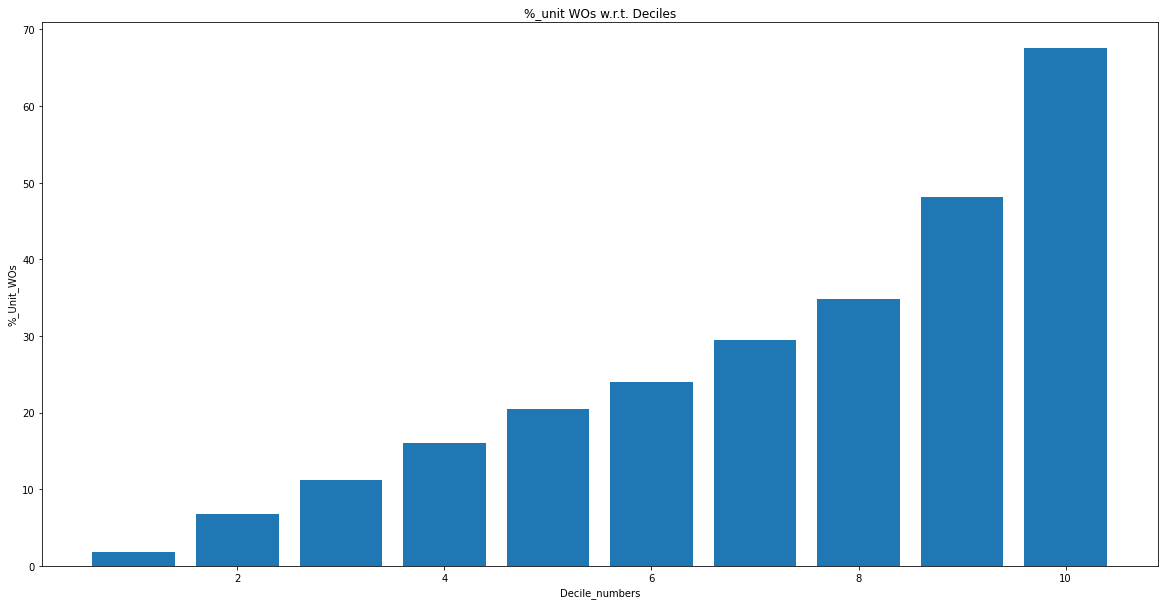

In [565]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

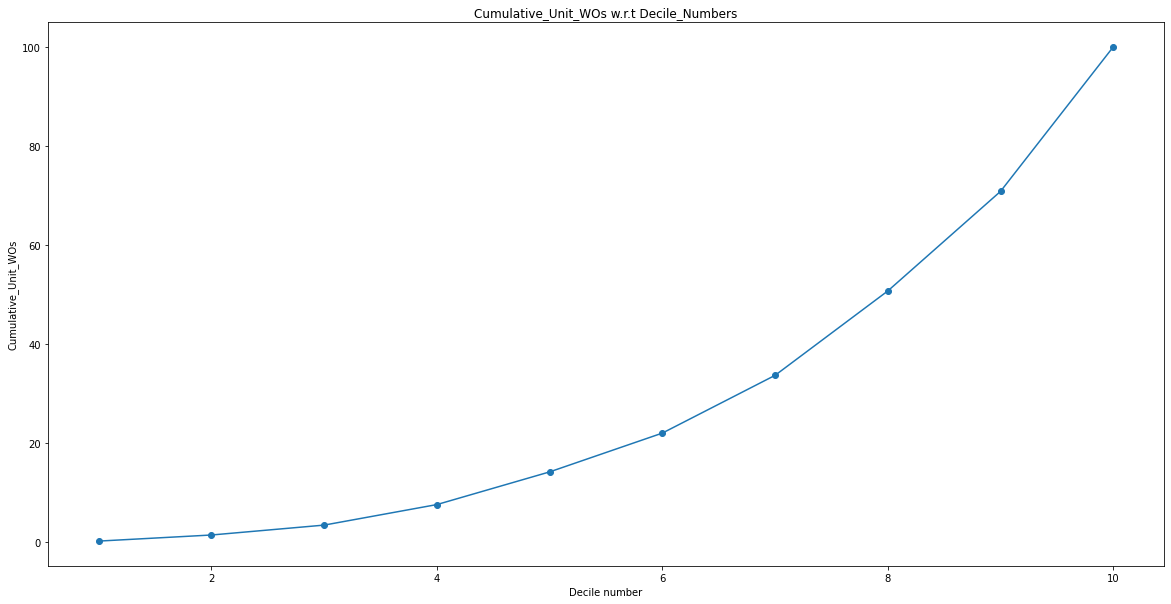

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Validation data

In [566]:
#converting this into a dataframe as y_val is a series {we get retained indexes}
check = pd.DataFrame(y_val)
check

,WriteOff_YN
675,0
459,0
1861,0
3191,0
1976,0
...,...
2489,0
2301,0
219,0
36,1


In [567]:
check['Predicted Values'] = predict_y_val

In [568]:
check

,WriteOff_YN,Predicted Values
675,0,0
459,0,0
1861,0,0
3191,0,0
1976,0,1
...,...,...
2489,0,0
2301,0,1
219,0,0
36,1,1


In [569]:
predict_y_proba_val

array([[0.6473851 , 0.35261488],
       [0.6591462 , 0.3408538 ],
       [0.6811422 , 0.31885782],
       ...,
       [0.7407695 , 0.2592305 ],
       [0.22020191, 0.7797981 ],
       [0.68751824, 0.31248176]], dtype=float32)

In [570]:
write_off1 = []
for i in predict_y_proba_val:
  write_off1.append(i[1])


In [571]:
check['Predicted_Prob_WO = 1'] = write_off1

In [572]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
675,0,0,0.352615
459,0,0,0.340854
1861,0,0,0.318858
3191,0,0,0.451713
1976,0,1,0.676120
...,...,...,...
2489,0,0,0.306498
2301,0,1,0.568121
219,0,0,0.259230
36,1,1,0.779798


In [573]:
check['OpportunityID'] = None

In [574]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [575]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
675,0,0,0.352615,0062M00000ibtPsQAI
459,0,0,0.340854,0062M00000npaTbQAI
1861,0,0,0.318858,0062M00000jrdpaQAA
3191,0,0,0.451713,0062M00000lVuh7QAC
1976,0,1,0.676120,0062M00000oAeKNQA0
...,...,...,...,...
2489,0,0,0.306498,0062M00000kze2RQAQ
2301,0,1,0.568121,0062M00000nGXm0QAG
219,0,0,0.259230,0062M00000nWh5YQAS
36,1,1,0.779798,0062M00000n1wiAQAQ


In [576]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.7841492
Min_propability_value:  0.08824936


In [577]:
check['Decile'] = None

In [578]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>=min_range[9]:
    d=10
    funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[8]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[8]):
    d=9
    funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[7]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[7]):
    d=8
    funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[6]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[6]):
    d=7
    funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[5]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[5]):
    d=6
    funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[4]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[4]):
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [579]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
675,0,0,0.352615,0062M00000ibtPsQAI,6
459,0,0,0.340854,0062M00000npaTbQAI,5
1861,0,0,0.318858,0062M00000jrdpaQAA,5
3191,0,0,0.451713,0062M00000lVuh7QAC,8
1976,0,1,0.676120,0062M00000oAeKNQA0,10
...,...,...,...,...,...
2489,0,0,0.306498,0062M00000kze2RQAQ,4
2301,0,1,0.568121,0062M00000nGXm0QAG,9
219,0,0,0.259230,0062M00000nWh5YQAS,3
36,1,1,0.779798,0062M00000n1wiAQAQ,10


In [580]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [581]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
2681,0,0,0.088249,0062M00000kzkqyQAA,1
3202,0,0,0.097357,0062M00000gam9BQAQ,1
2460,0,0,0.103315,0062M00000mfxWKQAY,1
2643,1,0,0.112850,0062M00000eRkVXQA0,1
1010,0,0,0.120518,0062M00000jrj2PQAQ,1
...,...,...,...,...,...
2993,0,1,0.738938,0062M00000kyqLhQAI,10
1298,1,1,0.755382,0062M00000mUINuQAO,10
703,1,1,0.773151,0062M00000n0MSBQA2,10
36,1,1,0.779798,0062M00000n1wiAQAQ,10


In [582]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [583]:
exp_df = check.copy()

In [584]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
2681,0,0,0.088249,0062M00000kzkqyQAA,1
3202,0,0,0.097357,0062M00000gam9BQAQ,1
2460,0,0,0.103315,0062M00000mfxWKQAY,1
2643,1,0,0.112850,0062M00000eRkVXQA0,1
1010,0,0,0.120518,0062M00000jrj2PQAQ,1
...,...,...,...,...,...
2993,0,1,0.738938,0062M00000kyqLhQAI,10
1298,1,1,0.755382,0062M00000mUINuQAO,10
703,1,1,0.773151,0062M00000n0MSBQA2,10
36,1,1,0.779798,0062M00000n1wiAQAQ,10


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [585]:
N = len(exp_df)
N

670

In [586]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

174

In [587]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    44
1     8
Name: WriteOff_YN, dtype: int64

In [588]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [589]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(8, 8, 13, 17, 17, 17, 19, 30, 27, 18)

In [590]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [591]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(8, 16, 29, 46, 63, 80, 99, 129, 156, 174)

In [592]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [593]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10) 

15.384615384615385 12.121212121212121 19.696969696969695 20.987654320987655 22.666666666666668 26.5625 26.027397260273972 42.25352112676056 40.90909090909091 32.142857142857146


In [594]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [595]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

4.597701149425287 9.195402298850574 16.666666666666664 26.436781609195403 36.206896551724135 45.97701149425287 56.896551724137936 74.13793103448276 89.65517241379311 100.0


In [596]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.45977011494252873 0.45977011494252873 0.5555555555555555 0.6609195402298851 0.7241379310344827 0.7662835249042145 0.8128078817733991 0.9267241379310345 0.996168582375479 1.0


In [597]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [598]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [599]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [600]:
no_of_opps

[52, 66, 66, 81, 75, 64, 73, 71, 66, 56]

In [601]:
sum(no_of_opps)

670

In [602]:
funded_amt

[1310600.0,
 1466200.0,
 1229125.0,
 2100890.0,
 1477350.0,
 1356057.0,
 1962762.0,
 2190950.0,
 1462086.0,
 1599692.92]

In [603]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.08112301, 0.09075427, 0.0760799 , 0.13004007, 0.09144443,
       0.08393669, 0.12149027, 0.13561457, 0.09049963, 0.09901717])

In [604]:
gross_amt

[52468.78,
 21293.37,
 68008.18,
 462716.3900000001,
 165443.59999999998,
 65022.439999999995,
 773433.4000000001,
 390110.56999999995,
 148887.99,
 127785.34999999999]

In [605]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.023061476015285312,
 0.03242049944864122,
 0.06231197037503223,
 0.26568858652399563,
 0.3384056120253024,
 0.36698476786836426,
 0.70693008017638,
 0.8783944358058473,
 0.9438348140717234,
 1.0]

In [606]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.04003416755684419,
 0.014522827717910244,
 0.055330564425912734,
 0.22024779498212665,
 0.11198673300165836,
 0.04794963633534578,
 0.3940535836744344,
 0.17805544170337065,
 0.10183258029965404,
 0.07988117494450123]

In [607]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            # 'Funded_WO_Gross_$':gross_amt,
            # '%_Funded_WO_Gross_$':gross_amt_pct,
            # "Cum_WO_$" :cum_gross_pct,
            # 'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Avg_Score,Min_Score,Max_Score
0,1,52,8,15.384615,4.597701,1310600.00,0.081123,15.15,6.25,18.98
1,2,66,8,12.121212,9.195402,1466200.00,0.090754,21.15,18.98,23.23
2,3,66,13,19.696970,16.666667,1229125.00,0.076080,25.20,23.24,27.05
3,4,81,17,20.987654,26.436782,2100890.00,0.130040,28.95,27.06,30.76
4,5,75,17,22.666667,36.206897,1477350.00,0.091444,32.65,30.77,34.47
5,6,64,17,26.562500,45.977011,1356057.00,0.083937,36.35,34.49,38.42
6,7,73,19,26.027397,56.896552,1962762.00,0.121490,40.58,38.43,43.05
7,8,71,30,42.253521,74.137931,2190950.00,0.135615,45.86,43.08,49.22
8,9,66,27,40.909091,89.655172,1462086.00,0.090500,53.19,49.24,57.16
9,10,56,18,32.142857,100.000000,1599692.92,0.099017,64.93,57.26,87.47


In [608]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
# final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
# final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Avg_Score,Min_Score,Max_Score
0,1,52,8,15.38,4.60,1310600.00,8.11,15.15,6.25,18.98
1,2,66,8,12.12,9.20,1466200.00,9.08,21.15,18.98,23.23
2,3,66,13,19.70,16.67,1229125.00,7.61,25.20,23.24,27.05
3,4,81,17,20.99,26.44,2100890.00,13.00,28.95,27.06,30.76
4,5,75,17,22.67,36.21,1477350.00,9.14,32.65,30.77,34.47
5,6,64,17,26.56,45.98,1356057.00,8.39,36.35,34.49,38.42
6,7,73,19,26.03,56.90,1962762.00,12.15,40.58,38.43,43.05
7,8,71,30,42.25,74.14,2190950.00,13.56,45.86,43.08,49.22
8,9,66,27,40.91,89.66,1462086.00,9.05,53.19,49.24,57.16
9,10,56,18,32.14,100.00,1599692.92,9.90,64.93,57.26,87.47


<BarContainer object of 10 artists>

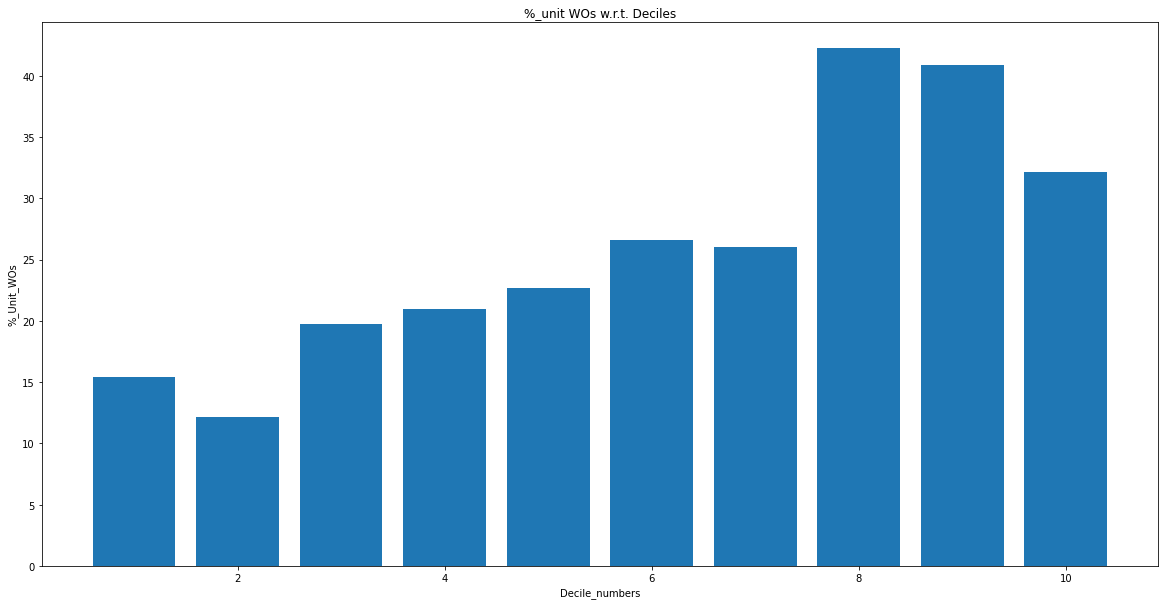

In [609]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

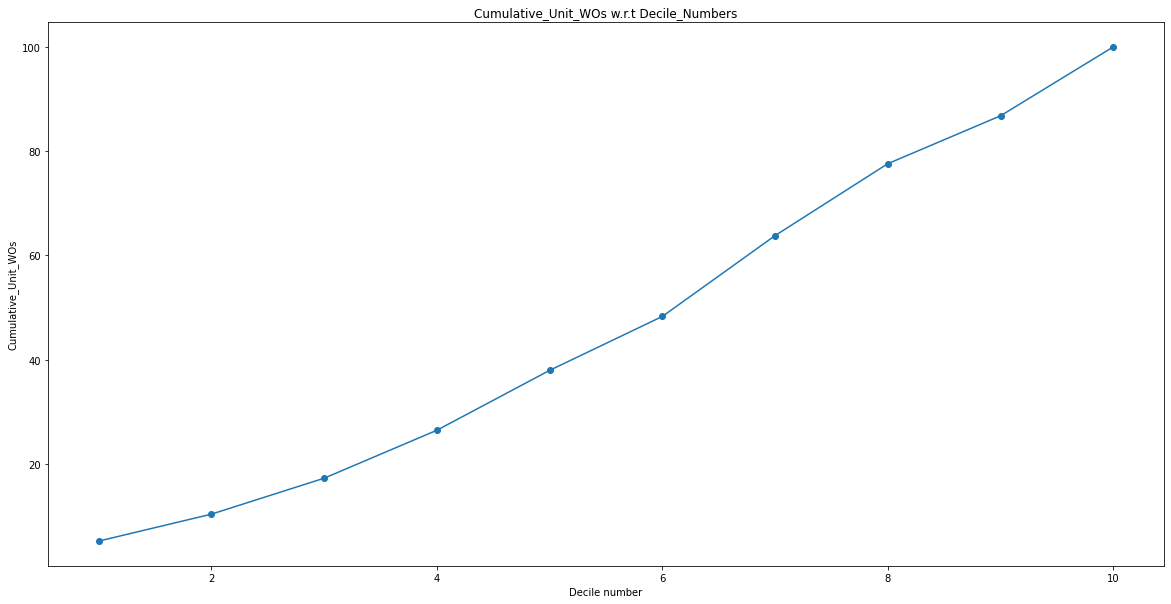

In [351]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Test Set

In [ ]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_test)
check

,WriteOff_YN
0,0
1,0
2,0
3,0
4,0
...,...
481,0
482,0
483,0
484,0


In [ ]:
check['Predicted Values'] = predict_y_test

In [ ]:
check

,WriteOff_YN,Predicted Values
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
481,0,1
482,0,1
483,0,1
484,0,0


In [ ]:
print(predict_y_proba_test)

[[0.28461277 0.7153872 ]
 [0.66327024 0.33672974]
 [0.22862142 0.7713786 ]
 [0.8026972  0.1973028 ]
 [0.36226732 0.6377327 ]
 [0.3093844  0.6906156 ]
 [0.4995337  0.5004663 ]
 [0.43662858 0.5633714 ]
 [0.27223527 0.7277647 ]
 [0.36792374 0.63207626]
 [0.44089067 0.55910933]
 [0.31859332 0.6814067 ]
 [0.45840514 0.54159486]
 [0.4915139  0.5084861 ]
 [0.20207405 0.79792595]
 [0.5781908  0.4218092 ]
 [0.6462403  0.3537597 ]
 [0.23659337 0.76340663]
 [0.24544352 0.7545565 ]
 [0.48416293 0.5158371 ]
 [0.5397574  0.4602426 ]
 [0.9009522  0.09904777]
 [0.26820576 0.73179424]
 [0.47340953 0.52659047]
 [0.38097    0.61903   ]
 [0.24282926 0.75717074]
 [0.6845926  0.31540737]
 [0.29058504 0.70941496]
 [0.8367979  0.1632021 ]
 [0.79180324 0.20819674]
 [0.31630147 0.68369853]
 [0.8949257  0.10507429]
 [0.8307183  0.16928169]
 [0.19034302 0.809657  ]
 [0.16748494 0.83251506]
 [0.33564115 0.66435885]
 [0.8828082  0.11719179]
 [0.8211777  0.17882231]
 [0.20424134 0.79575866]
 [0.7992343  0.20076571]


In [ ]:
write_off1 = []
for i in predict_y_proba_test:
  write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
0,0,1,0.715387
1,0,0,0.336730
2,0,1,0.771379
3,0,0,0.197303
4,0,1,0.637733
...,...,...,...
481,0,1,0.800026
482,0,1,0.778790
483,0,1,0.729231
484,0,0,0.116408


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
  check['OpportunityID'][i] = data_test['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
0,0,1,0.715387,0062M00000nqf6oQAA
1,0,0,0.336730,0062M00000nqfF3QAI
2,0,1,0.771379,0062M00000nqjtvQAA
3,0,0,0.197303,0062M00000nqs8FQAQ
4,0,1,0.637733,0062M00000nr94cQAA
...,...,...,...,...
481,0,1,0.800026,0062M00000oYVfWQAW
482,0,1,0.778790,0062M00000oYVWyQAO
483,0,1,0.729231,0062M00000oYYg7QAG
484,0,0,0.116408,0062M00000oYZI3QAO


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.8725887
Min_propability_value:  0.06348297


In [ ]:
check['Decile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>=min_range[9]:
    d=10
    funded_amt_d10 = funded_amt_d10+data_test['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[8]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[8]):
    d=9
    funded_amt_d9 = funded_amt_d9+data_test['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[7]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[7]):
    d=8
    funded_amt_d8 = funded_amt_d8+data_test['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[6]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[6]):
    d=7
    funded_amt_d7 = funded_amt_d7+data_test['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[5]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[5]):
    d=6
    funded_amt_d6 = funded_amt_d6+data_test['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[4]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[4]):
    d=5
    funded_amt_d5 = funded_amt_d5+data_test['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data_test['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data_test['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data_test['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data_test['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data_test['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data_test['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
0,0,1,0.715387,0062M00000nqf6oQAA,9
1,0,0,0.336730,0062M00000nqfF3QAI,5
2,0,1,0.771379,0062M00000nqjtvQAA,10
3,0,0,0.197303,0062M00000nqs8FQAQ,3
4,0,1,0.637733,0062M00000nr94cQAA,8
...,...,...,...,...,...
481,0,1,0.800026,0062M00000oYVfWQAW,10
482,0,1,0.778790,0062M00000oYVWyQAO,10
483,0,1,0.729231,0062M00000oYYg7QAG,9
484,0,0,0.116408,0062M00000oYZI3QAO,1


In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
325,0,0,0.063483,0062M00000oPRcuQAG,1
254,0,0,0.075990,0062M00000oBvrOQAS,1
173,0,0,0.078909,0062M00000oAQqwQAG,1
201,0,0,0.086396,0062M00000oB03NQAS,1
151,0,0,0.086658,0062M00000oAen7QAC,1
...,...,...,...,...,...
143,1,1,0.843398,0062M00000oAd5HQAS,10
322,1,1,0.853358,0062M00000oPQOUQA4,10
44,1,1,0.853358,0062M00000o8pSmQAI,10
439,1,1,0.866656,0062M00000oXyg9QAC,10


In [ ]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
325,0,0,0.063483,0062M00000oPRcuQAG,1
254,0,0,0.075990,0062M00000oBvrOQAS,1
173,0,0,0.078909,0062M00000oAQqwQAG,1
201,0,0,0.086396,0062M00000oB03NQAS,1
151,0,0,0.086658,0062M00000oAen7QAC,1
...,...,...,...,...,...
143,1,1,0.843398,0062M00000oAd5HQAS,10
322,1,1,0.853358,0062M00000oPQOUQA4,10
44,1,1,0.853358,0062M00000o8pSmQAI,10
439,1,1,0.866656,0062M00000oXyg9QAC,10


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [ ]:
N = len(exp_df)
N

486

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

114

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    42
1     2
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(2, 1, 3, 3, 6, 9, 22, 14, 29, 25)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(2, 3, 6, 9, 15, 24, 46, 60, 89, 114)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10) 

4.545454545454546 2.7027027027027026 6.122448979591836 7.6923076923076925 11.764705882352942 19.148936170212767 39.285714285714285 28.571428571428573 42.64705882352941 54.34782608695652


In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

1.7543859649122806 2.631578947368421 5.263157894736842 7.894736842105263 13.157894736842104 21.052631578947366 40.35087719298245 52.63157894736842 78.0701754385965 100.0


In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.17543859649122806 0.13157894736842105 0.17543859649122806 0.19736842105263158 0.2631578947368421 0.3508771929824561 0.5764411027568922 0.6578947368421052 0.8674463937621832 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [ ]:
no_of_opps

[44, 37, 49, 39, 51, 47, 56, 49, 68, 46]

In [ ]:
sum(no_of_opps)

486

In [ ]:
funded_amt

[550500,
 490586,
 1875500,
 789500,
 736500,
 3566015,
 1680500,
 2141000,
 1712000,
 726300]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.03858176, 0.03438269, 0.1314443 , 0.05533206, 0.05161756,
       0.24992394, 0.11777774, 0.15005185, 0.11998541, 0.05090269])

In [ ]:
gross_amt

[0.0,
 3481.25,
 32079.15,
 14911.74,
 23413.11,
 47820.649999999994,
 164095.54999999996,
 72630.83000000002,
 469011.5400000001,
 166470.52000000002]

In [ ]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.0,
 0.0035025654222878,
 0.035778133556257974,
 0.05078117697748479,
 0.07433764362429865,
 0.1224510957352723,
 0.28755138999201874,
 0.36062693290047504,
 0.8325101939871398,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.0,
 0.007096105473861872,
 0.01710431884830712,
 0.018887574414186193,
 0.03178969450101833,
 0.013410109043287814,
 0.09764686105325794,
 0.03392378794955629,
 0.2739553387850468,
 0.2292035247143054]

In [ ]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,44,2,4.545455,1.754386,550500,0.038582,0.00,0.000000,0.000000,6291.84,10.73,4.63,13.09
1,2,37,1,2.702703,2.631579,490586,0.034383,3481.25,0.007096,0.003503,8381.25,15.53,13.12,18.47
2,3,49,3,6.122449,5.263158,1875500,0.131444,32079.15,0.017104,0.035778,65769.15,21.09,18.50,24.65
3,4,39,3,7.692308,7.894737,789500,0.055332,14911.74,0.018888,0.050781,33551.72,27.78,24.68,31.77
4,5,51,6,11.764706,13.157895,736500,0.051618,23413.11,0.031790,0.074338,47840.46,38.24,31.78,45.01
5,6,47,9,19.148936,21.052632,3566015,0.249924,47820.65,0.013410,0.122451,103703.94,50.87,45.10,55.41
6,7,56,22,39.285714,40.350877,1680500,0.117778,164095.55,0.097647,0.287551,314895.29,59.39,55.41,62.73
7,8,49,14,28.571429,52.631579,2141000,0.150052,72630.83,0.033924,0.360627,156727.66,66.08,62.76,69.00
8,9,68,29,42.647059,78.070175,1712000,0.119985,469011.54,0.273955,0.832510,786536.54,72.40,69.05,75.86
9,10,46,25,54.347826,100.000000,726300,0.050903,166470.52,0.229204,1.000000,395072.17,80.58,75.96,92.59


In [ ]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,44,2,4.55,1.75,550500,3.86,0.00,0.00,0.00,6291.84,10.73,4.63,13.09
1,2,37,1,2.70,2.63,490586,3.44,3481.25,0.71,0.35,8381.25,15.53,13.12,18.47
2,3,49,3,6.12,5.26,1875500,13.14,32079.15,1.71,3.58,65769.15,21.09,18.50,24.65
3,4,39,3,7.69,7.89,789500,5.53,14911.74,1.89,5.08,33551.72,27.78,24.68,31.77
4,5,51,6,11.76,13.16,736500,5.16,23413.11,3.18,7.43,47840.46,38.24,31.78,45.01
5,6,47,9,19.15,21.05,3566015,24.99,47820.65,1.34,12.25,103703.94,50.87,45.10,55.41
6,7,56,22,39.29,40.35,1680500,11.78,164095.55,9.76,28.76,314895.29,59.39,55.41,62.73
7,8,49,14,28.57,52.63,2141000,15.01,72630.83,3.39,36.06,156727.66,66.08,62.76,69.00
8,9,68,29,42.65,78.07,1712000,12.00,469011.54,27.40,83.25,786536.54,72.40,69.05,75.86
9,10,46,25,54.35,100.00,726300,5.09,166470.52,22.92,100.00,395072.17,80.58,75.96,92.59


<BarContainer object of 10 artists>

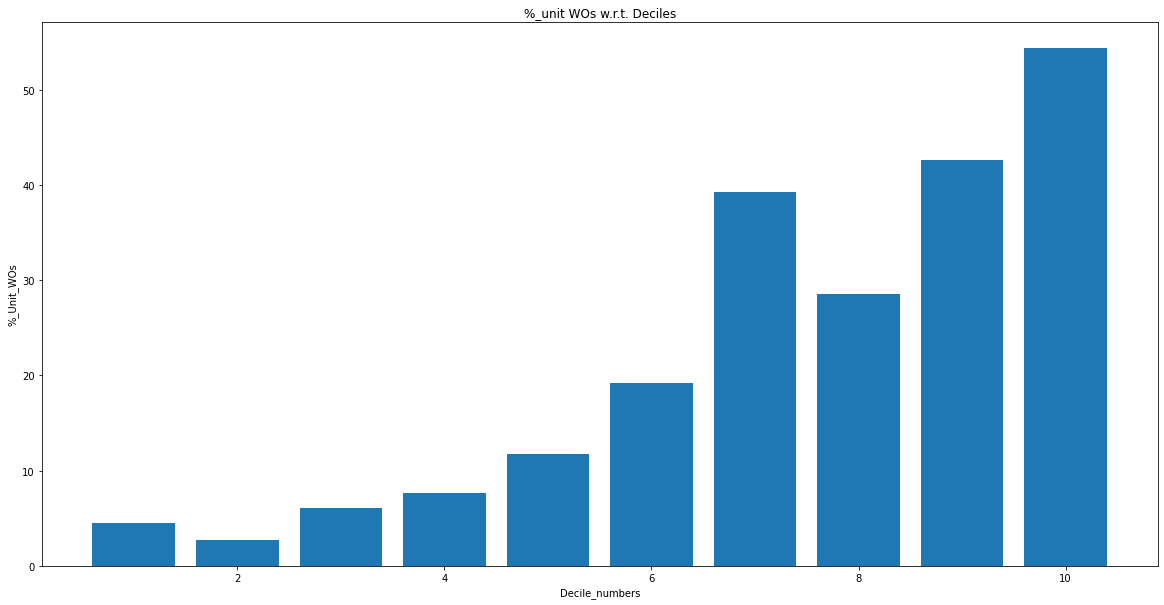

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

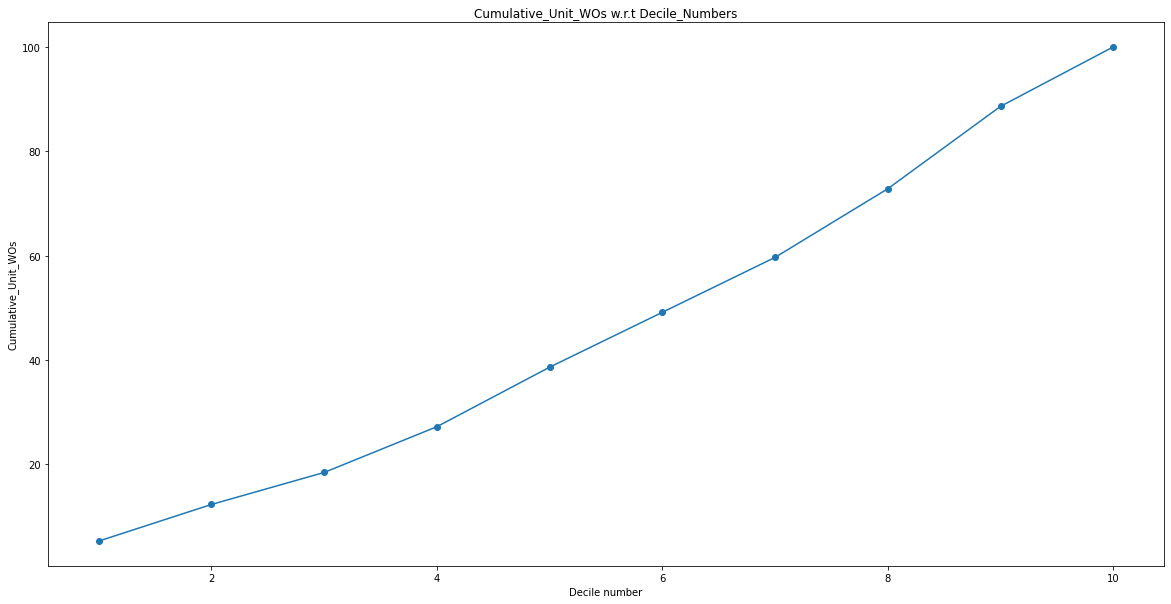

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}